In [1]:
from datasets import load_from_disk, disable_caching
disable_caching()

In [2]:
ds = load_from_disk('/home/yuuhanase/FPTU/DAT/vi_news_chatbot/artifacts/summary_dataset')
ds

Dataset({
    features: ['summary', 'text'],
    num_rows: 132236
})

In [3]:
def get_len(sample):
    sample['summary_len'] = len(sample['summary'].split(' '))
    sample['text_len'] = len(sample['text'].split(' '))
    return sample
stat_ds = ds.map(get_len)
stat_ds

Map:   0%|          | 0/132236 [00:00<?, ? examples/s]

Dataset({
    features: ['summary', 'text', 'summary_len', 'text_len'],
    num_rows: 132236
})

In [4]:
stat_ds[0]

{'summary': 'Mizuho Corporate Bank (MHCB) và Vietcombank đã ký kết một hợp đồng hợp tác kinh doanh. MHCB sẽ mua 347,6 triệu cổ phiếu phổ thông mới của Vietcombank với giá 34.000 đồng/CP và sẽ chỉ định một đại diện giữ vị trí thành viên HĐQT của Vietcombank. Đây là giao dịch đầu tư đầu tiên của Mizuho tại Việt Nam và là giao dịch lớn nhất tại thị trường Đông Nam Á của Tập đoàn. Hợp tác giữa hai ngân hàng sẽ tăng cường hơn nữa cấu trúc của ngân hàng nhằm hỗ trợ phát triển kinh doanh cho các khách hàng của MHCB tại Việt Nam. Phạm vi hợp tác kinh doanh bao gồm: hợp tác trong các lĩnh vực về giao dịch giữa các công ty, hoạt động ngân hàng đầu tư và kinh doanh chứng khoán, từ các khoản vay cho vay liên kết đến các hoạt động thanh toán.',
 'text': 'Cụ thể, MHCB sẽ đăng ký mua 347,6 triệu cổ phiếu phổ thông mới của Vietcombank với giá 34.000 đồng/CP và sẽ chỉ định một đại diện giữ vị trí thành viên HĐQT của Vietcombank. Theo Vietcombank, MHCB cũng sẽ là đối tác chiến lược duy nhất của Vietcomb

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(stat_ds)
df

,summary,text,summary_len,text_len
0,Mizuho Corporate Bank (MHCB) và Vietcombank đã...,"Cụ thể, MHCB sẽ đăng ký mua 347,6 triệu cổ phi...",153,775
1,Lễ khai mạc SEA Games 26 sẽ diễn ra tại cảng K...,Lễ khai mạc sẽ diễn ra tại cảng Kuto Besak bên...,109,287
2,"""Có thể hai vụ doanh nghiệp tặng xe sang cho t...",Chiếc xe biển xanh của Thành ủy Đà Nẵng Liên q...,49,705
3,"Tình trạng dừng đỗ, trông giữ xe tại các KĐT m...",Dạo qua các KĐT mới tại một số quận nội thành ...,135,830
4,"Tổng thống Pháp, Jacques Chirac, lần đầu ...",Ông Chirac nói những ai tìm cách truyền b...,28,542
...,...,...,...,...
132231,Wabi-sabi tạo nơi trú ẩn chống nỗi ám ảnh của ...,Wabi-sabi là một phần quan trọng của thẩm mỹ h...,39,2554
132232,Tập 1 vòng Giấu mặt Giọng hát Việt Nhí 2014 sẽ...,"Trong tập 1 vòng Giấu mặt phát sóng sắp tới, c...",115,438
132233,Hai trường hợp trẻ hái ăn nhiều trái sơ ri và ...,Đã có nhiều trường hợp trẻ hái ăn nhiều trái s...,82,590
132234,"Khoảng nửa tháng qua, có 2 con bò tót đã xuất ...","Con bò này có lông chân màu trắng, mình màu đe...",63,98


In [7]:
df.describe()

,summary_len,text_len
count,132236.000000,132236.000000
mean,75.271061,614.519609
std,52.790830,723.905467
min,1.000000,9.000000
25%,32.000000,294.000000
50%,57.000000,460.000000
75%,108.000000,729.000000
max,499.000000,35001.000000


In [8]:
df.loc[0 <= df['text_len']].loc[df['text_len'] <= 1339].loc[22<=df['summary_len']].loc[df['summary_len'] <= 128].describe()

,summary_len,text_len
count,96536.000000,96536.000000
mean,62.268749,477.188603
std,32.511695,278.836339
min,22.000000,21.000000
25%,33.000000,264.000000
50%,52.000000,414.000000
75%,91.000000,649.000000
max,128.000000,1339.000000


array([[<Axes: title={'center': 'summary_len'}>,
        <Axes: title={'center': 'text_len'}>]], dtype=object)

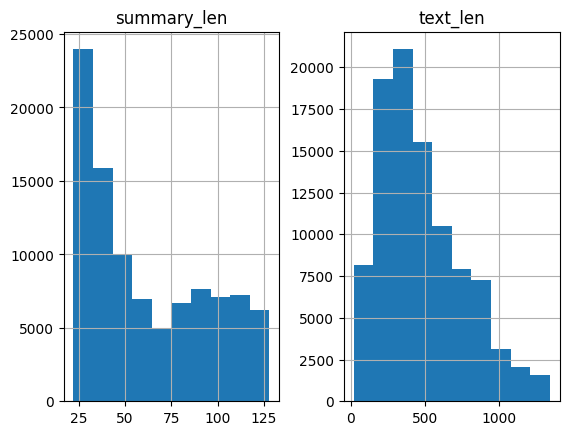

In [9]:
df.loc[0 <= df['text_len']].loc[df['text_len'] <= 1339].loc[22<=df['summary_len']].loc[df['summary_len'] <= 128].hist()